## Initial Modelling: Random Forest, Covariance, Choice of features

This sheet contains the data that I will use to choose what kinds of logistic regression models I will be running.  I will run a random forest on the choice of features and try to find the important one.

I have already seen that the progress 8 measure and it's assocaited scores dominate any random forest.  The response is the progress 8 measure therefore the modules that aggregate to make the overall progress 8 score will be the most important features!

The featue set I have chosen has progress 8 scores for disadvantaged, non-disadvantaged pupils and the overall progress 8 scores together with other variables.  The full list can be seen in the Meta Data file.<ref here>

In [1]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
#printing of multiple outputs from a cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#curl down data
!curl https://raw.githubusercontent.com/Trakky1/Notes_DAT17/master/ks4_meta_subset.csv -o ks4_meta_subset.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3304  100  3304    0     0  19209      0 --:--:-- --:--:-- --:--:-- 19209


In [4]:
#now read in csv to dataframes
df_raw=pd.read_csv("census.csv",na_values=['NP',' ','SUPP','NE','LOWCOV',None])
df_school_raw=pd.read_csv("england_ks4final.csv",na_values=['NP',' ','SUPP','LOWCOV','NE',None],low_memory=False)
ks4_meta_subset=pd.read_csv('ks4_meta_subset.csv', na_values=['NP',' ','SUPP','NE','LOWCOV',None])

In [5]:
#now let's have a look at them:
df_raw.head()
df_school_raw.head()
ks4_meta_subset.head()

,URN,LA,ESTAB,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,PSENELSE,...,PSENELK,NUMEAL,NUMENGFL,NUMUNCFL,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSM,NUMFSMEVER,PNUMFSMEVER
0,100000,201,3614.0,250.0,119.0,131.0,47.6,52.4,7.0,2.8,...,16.0,99.0,71.0,6.0,56.3,40.3,3.4,21.1,59.0,28.6
1,100001,201,6005.0,730.0,730.0,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,100002,201,6006.0,253.0,105.0,148.0,41.5,58.5,1.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,100003,201,6007.0,918.0,0.0,918.0,0.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,100463,201,6354.0,204.0,100.0,104.0,49.0,51.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


,RECTYPE,ALPHAIND,LEA,ESTAB,URN,SCHNAME,SCHNAME_AC,ADDRESS1,ADDRESS2,ADDRESS3,...,TAVENT_GAV_PTQ_EE,TAVENT_GHI_PTQ_EE,TAVENT_GFSM6CLA1A_PTQ_EE,TAVENT_GNFSM6CLA1A_PTQ_EE,TAVENT_GFSM_13,TAVENT_GNFSM_13,TAVENT_GFSM_14_PTQ,TAVENT_GNFSM_14_PTQ,TAVENT_GFSM6CLA1A_15_PTQ_EE,TAVENT_GNFSM6CLA1A_15_PTQ_EE
0,1,11828.0,201.0,6007.0,100003.0,City of London School,NaN,Queen Victoria Street,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,11830.0,201.0,6005.0,100001.0,City of London School for Girls,NaN,St Giles' Terrace,Barbican,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,368.0,202.0,4285.0,100053.0,Acland Burghley School,NaN,Burghley Road,NaN,NaN,...,8.9,9.8,8.4,9.5,8.1,9.8,9.0,10.2,8.4,10.6
4,1,9318.0,202.0,4611.0,100054.0,The Camden School for Girls,NaN,Sandall Road,NaN,NaN,...,8.2,10.2,7.8,9.8,8.6,9.3,7.3,8.6,7.5,8.9


,Column,Metafile heading,Metafile description
0,1,RECTYPE,Record type (1=mainstream school; 2=special sc...
1,2,ALPHAIND,Alphabetic sorting index
2,3,LEA,Local authority code (see separate list of loc...
3,4,ESTAB,Establishment number
4,5,URN,School Unique Reference Number


In [7]:
#drop independent schools
ValList = ('IND','INDSPEC')  #independent schools
df_Int=df_school_raw
df_Ref=df_Int[~df_Int.NFTYPE.isin(ValList)]
cols_of_int =['ESTAB','URN','NFTYPE','P8MEA']
df_Ref[cols_of_int].isnull().sum()

ESTAB     154
URN       154
NFTYPE    154
P8MEA     619
dtype: int64

In [11]:
#now take subset with columns that i am interested in
cols=ks4_meta_subset['Metafile heading']
lst=[df_Ref.columns.get_loc(c) for c in df_Ref.columns if c in cols]
df_data=df_Ref[cols]
df_data.head().transpose()

,2,3,4,7,8
RECTYPE,4,1,1,1,1
ALPHAIND,NaN,368,9318,22308,23176
LEA,201,202,202,202,202
ESTAB,NaN,4285,4611,4275,4104
URN,NaN,100053,100054,100052,100049
NFTYPE,NaN,CY,VA,CY,CY
RELDENOM,NaN,Does not apply,NaN,Does not apply,Does not apply
ADMPOL,NaN,COMP,COMP,COMP,COMP
EGENDER,NaN,MIXED,GIRLS,MIXED,MIXED
BPUP,NaN,109,NaN,133,136


In [21]:
#fill Nans for columns with 0 that are gendered, if they are blank it will be because the school is single sex.
gendered=ks4_meta_subset.index[(ks4_meta_subset['Metafile heading'].str.contains('BOYS')) | (ks4_meta_subset['Metafile heading'].str.contains('GIRLS'))| (ks4_meta_subset['Metafile description'].str.contains('girls')) | (ks4_meta_subset['Metafile description'].str.contains('boys')) ]
gendered_desc=ks4_meta_subset.loc[gendered]

gendered_desc[['Metafile heading','Metafile description']]

,Metafile heading,Metafile description
9,BPUP,Number of boys at the end of key stage 4
10,PBPUP,Percentage of pupils at the end of key stage 4...
11,GPUP,Number of girls at the end of key stage 4
12,PGPUP,Percentage of pupils at the end key stage 4 wh...
39,ATT8SCR_GIRLS,Average Attainment 8 score per girl
40,P8PUP_GIRLS,Number of girls included in Progress 8 measure
41,P8MEA_GIRLS,Progress 8 measure - girls
42,ATT8SCR_BOYS,Average Attainment 8 score per boy
43,P8PUP_BOYS,Number of boys included in Progress 8 measure
44,P8MEA_BOYS,Progress 8 measure - boys


In [22]:
#now fill the columns with 0s
cols2fill=gendered_desc['Metafile heading']
df_data[cols2fill]=df_data[cols2fill].fillna(0)
df_data[cols2fill].isnull().sum()

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


BPUP             0
PBPUP            0
GPUP             0
PGPUP            0
ATT8SCR_GIRLS    0
P8PUP_GIRLS      0
P8MEA_GIRLS      0
ATT8SCR_BOYS     0
P8PUP_BOYS       0
P8MEA_BOYS       0
dtype: int64

In [25]:
#now join dataframes, schools data with census data
df_raw['URN']=pd.to_numeric(df_raw['URN'], errors = 'coerce')
df_Working=pd.merge(left=df_raw,right=df_data, left_on='URN', right_on='URN')
df_Working.shape
df_Working.head().transpose()

(4327, 65)

,0,1,2,3,4
URN,137181,100049,100050,100051,100052
LA,202,202,202,202,202
ESTAB_x,4000,4104,4166,4196,4275
NOR,835,1227,1114,831,1205
NORG,388,497,1060,367,540
NORB,447,730,54,464,665
PNORG,46.5,40.5,95.2,44.2,44.8
PNORB,53.5,59.5,4.8,55.8,55.2
TSENELSE,32,51,14,35,30
PSENELSE,3.8,4.2,1.3,4.2,2.5


Axes(0.125,0.125;0.62x0.755)


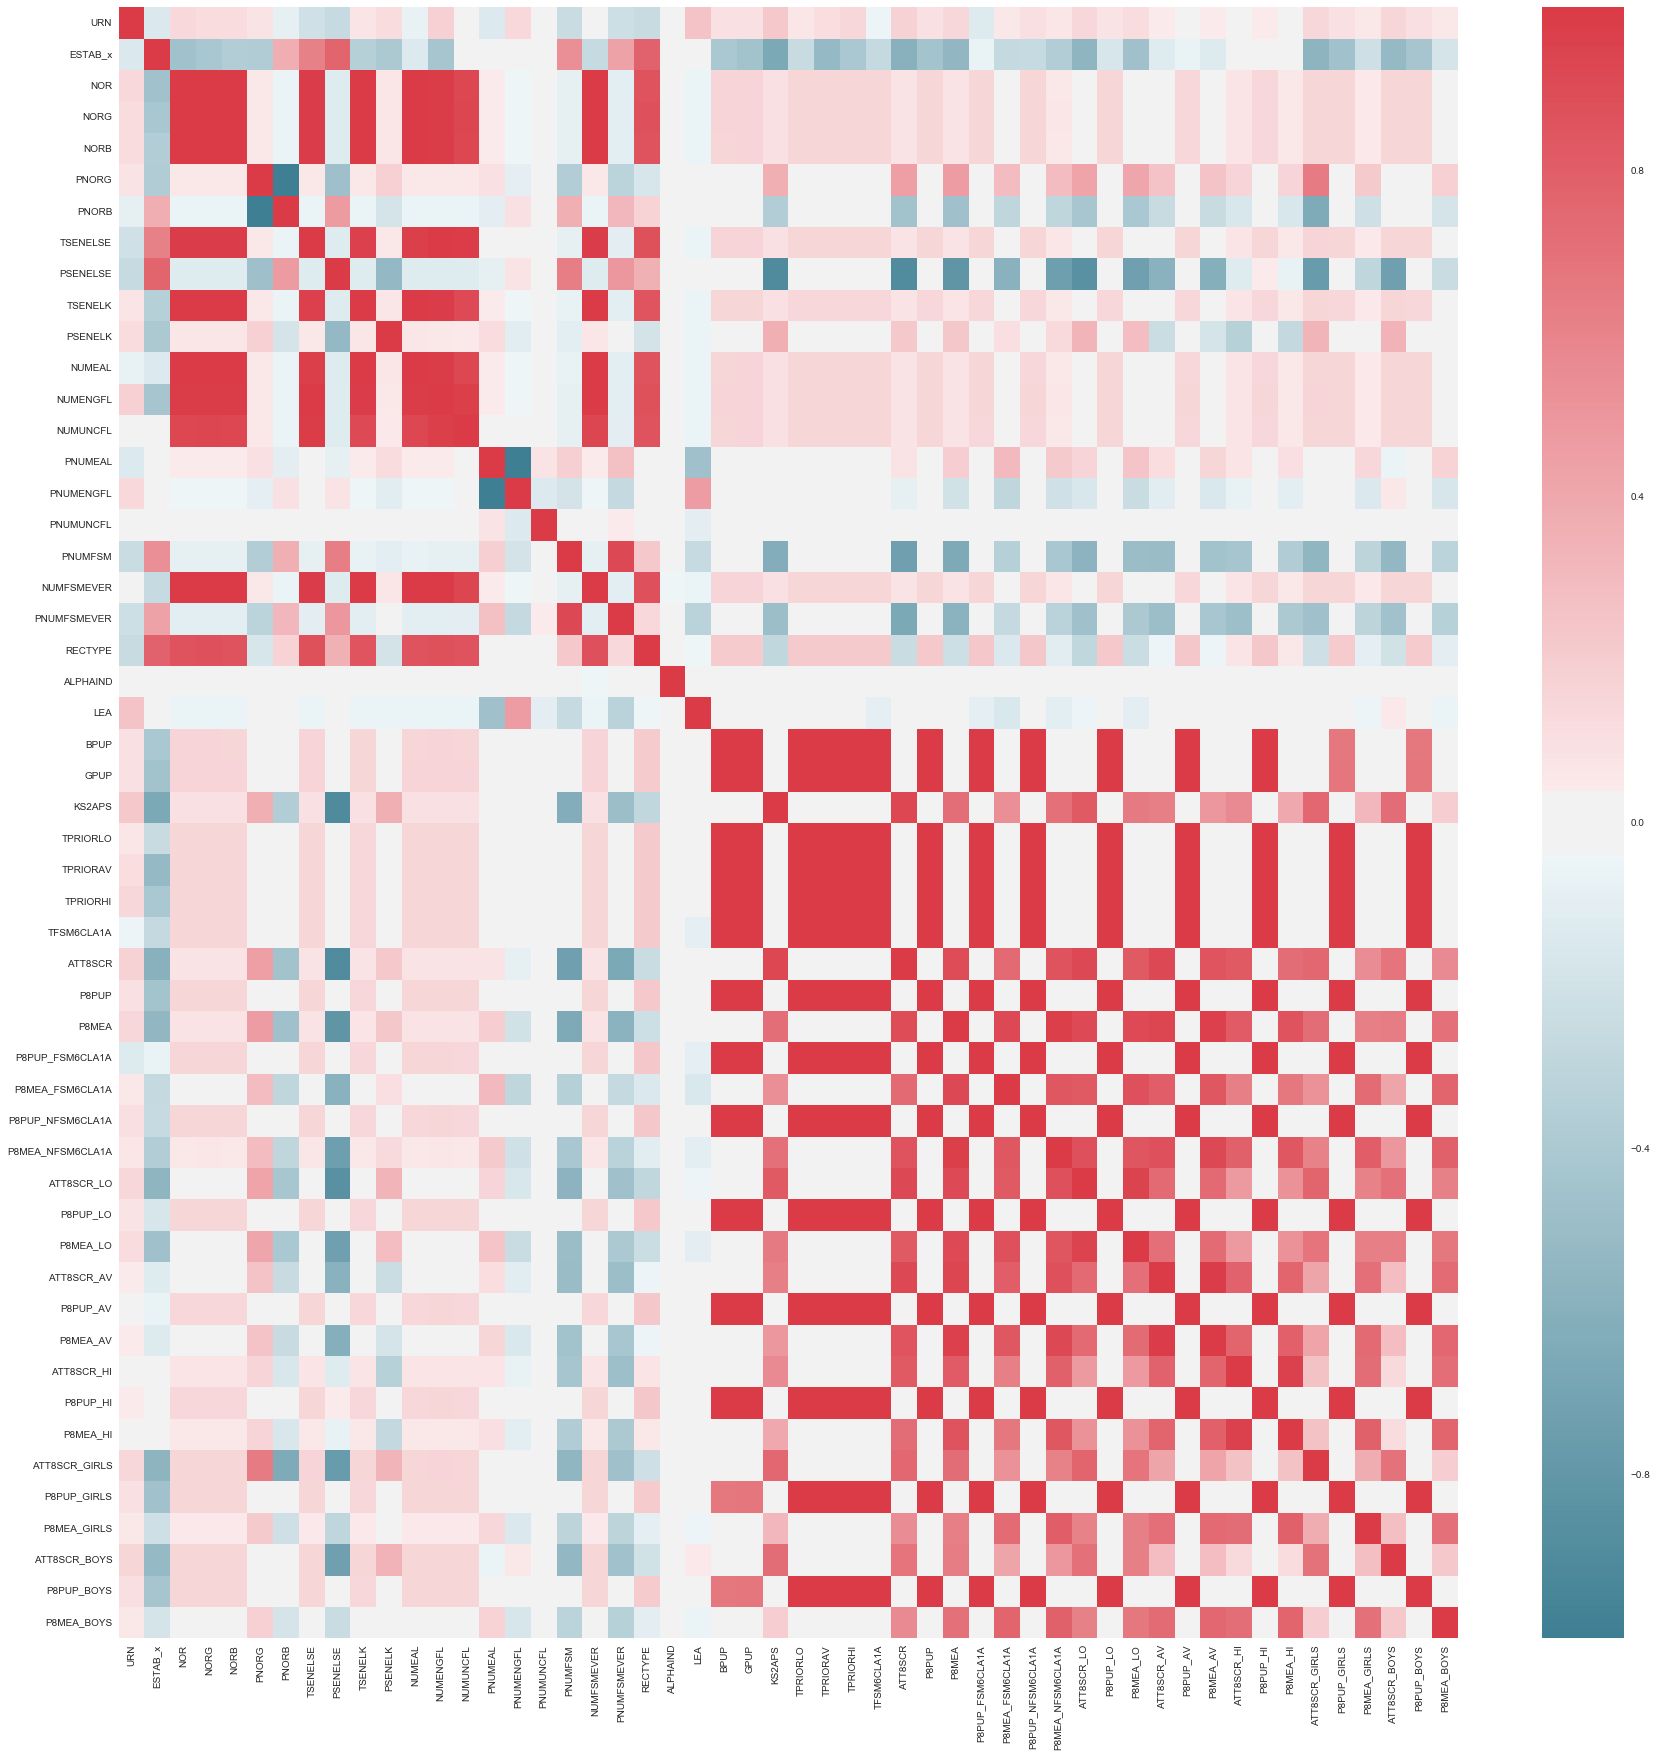

In [28]:
df_Working.drop('ESTAB_y',axis = 1, inplace = True)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#maybe a heat map will make clearer
fig, ax = plt.subplots(figsize=(30,30)) 
correlations= df_Working.corr()
print sns.heatmap(correlations, cmap=cmap)

In [30]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]


In [31]:
#reindex dataframe
cols2=df_Working.columns.tolist()
cols2.insert(0,cols2.pop(cols2.index('P8MEA')))
df_work=df_Working
df_work=df_work.reindex(columns=cols2)
column_index(df_work,['P8MEA'])

array([0], dtype=int64)

In [32]:
#find cols wth % and convert to float
df_obj=df_work.select_dtypes(include =[object])
obj_cols=df_obj.columns.tolist()
#now force the columns with % to floats
df_check=df_obj
Objcols=df_check.columns[1:].tolist()
perc=[col for col in df_check if col[:2]=='PT']

In [33]:
#from https://stackoverflow.com/questions/27954343/how-to-use-pythons-str-replace-method-on-all-columns-in-a-pandas-dataframe

def f(s):
    """ convert string to float if possible """
    s = s.strip()  # remove spaces at beginning and end of string
    if s.endswith('%'):  # remove %, if exists
        s = s[:-1]
    try:
        return float(s)
    except ValueError: # converting did not work
        return s  # return original string

df_work[perc]=df_work[perc]. astype(str)
df_work[perc]=df_work[perc].applymap(f)

In [34]:
#check:

df_work[perc].head()
df_work[perc].tail()

,PTPRIORLO,PTPRIORAV,PTPRIORHI,PTFSM6CLA1A
0,NaN,NaN,NaN,NaN
1,20.0,61.0,19.0,75.0
2,11.0,49.0,40.0,62.0
3,25.0,62.0,13.0,65.0
4,26.0,49.0,25.0,58.0


,PTPRIORLO,PTPRIORAV,PTPRIORHI,PTFSM6CLA1A
4322,16.2,50.0,33.8,16.0
4323,16.1,47.9,36.0,18.8
4324,19.7,51.9,28.4,17.4
4325,NaN,NaN,NaN,NaN
4326,18.2,51.0,30.8,27.7


In [36]:
#actually can fill NaNs in % columns with zeros too
#first drop all rows where P8MEA is NaN
df_work.dropna(subset=['P8MEA'], inplace =True)
df_work[perc]=df_work[perc].fillna(0)
df_work[perc].isnull().sum()


PTPRIORLO      0
PTPRIORAV      0
PTPRIORHI      0
PTFSM6CLA1A    0
dtype: int64

In [37]:
df_work.dtypes

P8MEA               float64
URN                 float64
LA                   object
ESTAB_x             float64
NOR                 float64
NORG                float64
NORB                float64
PNORG               float64
PNORB               float64
TSENELSE            float64
PSENELSE            float64
TSENELK             float64
PSENELK             float64
NUMEAL              float64
NUMENGFL            float64
NUMUNCFL            float64
PNUMEAL             float64
PNUMENGFL           float64
PNUMUNCFL           float64
PNUMFSM             float64
NUMFSMEVER          float64
PNUMFSMEVER         float64
RECTYPE               int64
ALPHAIND            float64
LEA                 float64
NFTYPE               object
RELDENOM             object
ADMPOL               object
EGENDER              object
BPUP                float64
                     ...   
TPRIORLO            float64
PTPRIORLO           float64
TPRIORAV            float64
PTPRIORAV           float64
TPRIORHI            

In [38]:
#need to get dummies for the columns i am leaviung in!
Gender=pd.get_dummies(df_work['EGENDER'],prefix='Gender')
ADMPol=pd.get_dummies(df_work['ADMPOL'],prefix='AdmitPol')

In [39]:
df_work.drop(['EGENDER','ADMPOL'],axis=1,inplace=True) #drop the columns we have dummies for
df_work2=df_work.join(Gender.iloc[:,0:2])
df_work2=df_work2.join(ADMPol.iloc[:,0:3])
df_work2.head()

,P8MEA,URN,LA,ESTAB_x,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,...,P8PUP_GIRLS,P8MEA_GIRLS,ATT8SCR_BOYS,P8PUP_BOYS,P8MEA_BOYS,Gender_BOYS,Gender_GIRLS,AdmitPol_COMP,AdmitPol_MOD,AdmitPol_SEL
1,-0.11,100049.0,202,4104.0,1227.0,497.0,730.0,40.5,59.5,51.0,...,69.0,0.15,45.5,132.0,-0.25,0,0,1,0,0
2,0.18,100050.0,202,4166.0,1114.0,1060.0,54.0,95.2,4.8,14.0,...,169.0,0.18,0.0,0.0,0.00,0,1,1,0,0
3,-0.15,100051.0,202,4196.0,831.0,367.0,464.0,44.2,55.8,35.0,...,46.0,0.05,42.7,69.0,-0.29,0,0,1,0,0
4,0.09,100052.0,202,4275.0,1205.0,540.0,665.0,44.8,55.2,30.0,...,68.0,0.44,46.7,126.0,-0.09,0,0,1,0,0
5,-0.26,100053.0,202,4285.0,974.0,346.0,628.0,35.5,64.5,49.0,...,61.0,-0.13,49.9,108.0,-0.33,0,0,1,0,0


In [40]:
#religious schools
FaithS=pd.get_dummies(df_work['RELDENOM'],prefix='Faith_school')
FaithS.head()

,Faith_school_Christian,Faith_school_Church of England,Faith_school_Church of England/Christian,Faith_school_Church of England/Roman Catholic,Faith_school_Does not apply,Faith_school_Jewish,Faith_school_Muslim,Faith_school_Roman Catholic,Faith_school_Roman Catholic/Church of England,Faith_school_Sikh
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0


In [43]:
#reindex
colsF=FaithS.columns.tolist()
colsF.insert(0,colsF.pop(colsF.index('Faith_school_Does not apply')))
FaithS=FaithS.reindex(columns=colsF)
column_index(FaithS,['Faith_school_Does not apply'])

array([0], dtype=int64)

In [44]:
df_work2=df_work2.join(FaithS.iloc[:,1:])
df_work2.head()

,P8MEA,URN,LA,ESTAB_x,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,...,AdmitPol_SEL,Faith_school_Christian,Faith_school_Church of England,Faith_school_Church of England/Christian,Faith_school_Church of England/Roman Catholic,Faith_school_Jewish,Faith_school_Muslim,Faith_school_Roman Catholic,Faith_school_Roman Catholic/Church of England,Faith_school_Sikh
1,-0.11,100049.0,202,4104.0,1227.0,497.0,730.0,40.5,59.5,51.0,...,0,0,0,0,0,0,0,0,0,0
2,0.18,100050.0,202,4166.0,1114.0,1060.0,54.0,95.2,4.8,14.0,...,0,0,0,0,0,0,0,0,0,0
3,-0.15,100051.0,202,4196.0,831.0,367.0,464.0,44.2,55.8,35.0,...,0,0,0,0,0,0,0,0,0,0
4,0.09,100052.0,202,4275.0,1205.0,540.0,665.0,44.8,55.2,30.0,...,0,0,0,0,0,0,0,0,0,0
5,-0.26,100053.0,202,4285.0,974.0,346.0,628.0,35.5,64.5,49.0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_work2.drop('RELDENOM',axis=1, inplace=True)

In [47]:
df_work2.isnull().sum()
df_work2.shape

P8MEA                                              0
URN                                              304
LA                                                 0
ESTAB_x                                          304
NOR                                                1
NORG                                               1
NORB                                               1
PNORG                                              1
PNORB                                              1
TSENELSE                                           1
PSENELSE                                           1
TSENELK                                            1
PSENELK                                            1
NUMEAL                                             1
NUMENGFL                                           1
NUMUNCFL                                           1
PNUMEAL                                            1
PNUMENGFL                                          1
PNUMUNCFL                                     

(3779, 75)

In [48]:
#drop null rows
df_work2[['NUMFSMEVER','PNUMFSMEVER']]=df_work2[['NUMFSMEVER','PNUMFSMEVER']].fillna(0)
df_work2.shape
df_work3=df_work2.dropna()
df_work3.shape

(3779, 75)

(2794, 75)

In [50]:

#Now run a random forest on remaining variables
#we want to predict progress 8 measure P8MEA based on the rest of the dataset
#y has to be binary

features=list(df_work3.columns[1:])
y=pd.DataFrame(df_work3['P8MEA'].apply(lambda x: 0 if x<0 else 1))
X=df_work3[features]

In [52]:
df_work3.head().transpose()

,1,2,3,4,5
P8MEA,-0.11,0.18,-0.15,0.09,-0.26
URN,100049,100050,100051,100052,100053
LA,202,202,202,202,202
ESTAB_x,4104,4166,4196,4275,4285
NOR,1227,1114,831,1205,974
NORG,497,1060,367,540,346
NORB,730,54,464,665,628
PNORG,40.5,95.2,44.2,44.8,35.5
PNORB,59.5,4.8,55.8,55.2,64.5
TSENELSE,51,14,35,30,49


In [53]:
df_work3.to_csv('df_work3.csv')

In [54]:
#check again for %
#find cols wth % and convert to float
colsC=['PGPUP','P8MEACOV','PBPUP']
df_work3[colsC]=df_work3[colsC]. astype(str)
df_work3[colsC]=df_work3[colsC].applymap(f)

In [56]:
#another column to convert to dummies NFTYPE
SchoolType=pd.get_dummies(df_work['NFTYPE'],prefix='School_type')
df_work3=df_work3.join(SchoolType.iloc[:,1:])
df_work3.drop('NFTYPE',axis=1, inplace=True)


In [57]:
from sklearn.ensemble import RandomForestClassifier
features=list(df_work3.columns[1:])
y=pd.DataFrame(df_work3['P8MEA'].apply(lambda x: 0 if x<0 else 1))
X=df_work3[features]


model = RandomForestClassifier(n_estimators = 20)
model.fit(X,y)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [58]:
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
47,ATT8SCR_AV,0.223056
58,P8MEA_BOYS,0.144998
55,P8MEA_GIRLS,0.124086
49,P8MEA_AV,0.092690
43,P8MEA_NFSM6CLA1A,0.071867


In [59]:
c, r = y.shape
y_reshpe = y.values.reshape(c,) #cross validation needs a 1 dimensional series

In [60]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y_reshpe, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CV AUC [ 0.99637297  0.99585503  0.9959635 ], Average AUC 0.996063833125


In [61]:
features_df.iloc[0:21]

,Features,Importance Score
47,ATT8SCR_AV,0.223056
58,P8MEA_BOYS,0.144998
55,P8MEA_GIRLS,0.124086
49,P8MEA_AV,0.092690
43,P8MEA_NFSM6CLA1A,0.071867
41,P8MEA_FSM6CLA1A,0.039383
46,P8MEA_LO,0.036729
37,ATT8SCR,0.033789
50,ATT8SCR_HI,0.031175
52,P8MEA_HI,0.029754


In [62]:
#now export working dataframe
df_work3.to_csv('Working_dataFrameFINAL.csv')

The random forest explains 99% of the variability seen in the data!

The random forest modells the outcome: _1 where P8 score is at least the average that is 0 or 0 where the progress 8 score is below the average across the country_.
We have already seen that for disadvantaged  pupils the average P8 measure is less than the P8 measure for non-disadvantaged students.  This helps to explain the lower importance of the % of pupils receiving free school meals.

I will explore this data more using logistic regressions, one for the disadvantage, one for the non-disadvantaged and one for all pupils overall.

In [63]:
#before we leave lets just look at cross validation of the above random forest.

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y_reshpe, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

n trees: 1, CV AUC [ 0.92507369  0.9320026   0.90896754], Average AUC 0.922014612363
n trees: 11, CV AUC [ 0.99214259  0.99519266  0.99617352], Average AUC 0.994502924399
n trees: 21, CV AUC [ 0.9968773   0.99592196  0.99689589], Average AUC 0.996565048547
n trees: 31, CV AUC [ 0.99795044  0.99588503  0.99743132], Average AUC 0.997088929802
n trees: 41, CV AUC [ 0.99730564  0.99587118  0.99756748], Average AUC 0.99691476764
n trees: 51, CV AUC [ 0.99730794  0.99666279  0.99776827], Average AUC 0.997246332995
n trees: 61, CV AUC [ 0.99808401  0.99647354  0.99820215], Average AUC 0.997586567993
n trees: 71, CV AUC [ 0.99789287  0.99722822  0.99801752], Average AUC 0.997712871517
n trees: 81, CV AUC [ 0.99836266  0.99690743  0.99793213], Average AUC 0.997734070668
n trees: 91, CV AUC [ 0.99830048  0.99614121  0.9977475 ], Average AUC 0.997396394418


In [64]:
#even though 81 trees gives the 'best' fit, there is only 1/1000 in it, look at the forest with 31 trees
model = RandomForestClassifier(n_estimators = 20)
model.fit(X,y)
feature_importancesB = model.feature_importances_

featuresB_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
featuresB_df.sort_values('Importance Score', inplace=True, ascending=False)

featuresB_df.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

,Features,Importance Score
47,ATT8SCR_AV,0.223056
58,P8MEA_BOYS,0.144998
55,P8MEA_GIRLS,0.124086
49,P8MEA_AV,0.092690
43,P8MEA_NFSM6CLA1A,0.071867
